# Data exploration 
## Reading and accessing salary data

The following module reads the input using pandas and prints the first row. Using Pandas data is stored as a dataframes which provides excel or SQL table kind of structure.


In [1]:
import pandas as pd
#read the profiles of student from various background contained in a csv
salary_df = pd.read_csv("Project_Stage1_SK.csv")
print(salary_df.head(1))
#display columns present in csv
salary_df.columns

   candidateid  salary             doj      dol              designation  \
0       203097  420000  1/06/2012 0:00  present  senior quality engineer   

     jobcity gender              dob  tenthpercentage  \
0  Bangalore      f  19/02/1990 0:00             84.3   

                       tenthboard    ...      english  logical quant  \
0  board ofsecondary education,ap    ...          515      585   525   

   computerprogramming  electronicsandsemicon computerscience mechanicalengg  \
0                  445                     -1              -1             -1   

   electricalengg  telecomengg  civilengg  
0              -1           -1         -1  

[1 rows x 29 columns]


Index(['candidateid', 'salary', 'doj', 'dol', 'designation', 'jobcity',
       'gender', 'dob', 'tenthpercentage', 'tenthboard', 'twelvegraduation',
       'twelvepercentage', 'twelveboard', 'collegeid', 'collegetier', 'degree',
       'specialization', 'collegepercentage', 'graduationyear', 'english',
       'logical', 'quant', 'computerprogramming', 'electronicsandsemicon',
       'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg',
       'civilengg'],
      dtype='object')

## Accessing data values from data frame
The following module access and prints CandidateID and Salary of the first row. 


In [2]:
column_name = salary_df.columns
columns = ["candidateid","salary"]
first_row = salary_df.loc[0]
print(first_row[columns])#gives the output for first row of the columns in the dataframe


candidateid    203097
salary         420000
Name: 0, dtype: object


# Exploration and Cleaning of data


# Reading metadata of the dataset
The following module prints the number of columns,rows and the description such as count, stand deviation and mean etc..

In [3]:
#print the number of rows
matrix = salary_df.shape
num_rows = matrix[0]
print("number of rows:",num_rows)
#print the number of columns
num_columns = matrix[1]
print("number of columns:",num_columns)
# calculating the descriptive statistics data for salary data
description = salary_df.describe()
print(description)


number of rows: 3972
number of columns: 29
          candidateid          salary  tenthpercentage  twelvegraduation  \
count     3972.000000     3972.000000      3972.000000       3972.000000   
mean    663158.822004   307915.156093        77.935420       2008.083585   
std     363389.880152   213053.117617         9.843093          1.651922   
min      11244.000000    35000.000000        43.000000       1995.000000   
25%     334013.000000   180000.000000        71.790000       2007.000000   
50%     639022.000000   300000.000000        79.200000       2008.000000   
75%     990499.500000   370000.000000        85.670000       2009.000000   
max    1298275.000000  4000000.000000        97.760000       2013.000000   

       twelvepercentage     collegeid  collegetier  collegepercentage  \
count       3972.000000   3972.000000  3972.000000        3972.000000   
mean          74.469534   5157.387966     1.926234          71.682424   
std           11.003199   4806.529312     0.261423   

# Cleaning of Data based on above description of the dataset

In [4]:
#The following module drops columns that are found to be unrelated to target column(Salary)
salary_df = salary_df.drop("dol",1) #dol - date of leaving
#salary_df = salary_df.drop("collegestate",1)

#The following module does not consider the JobCity marked as 'NA'
salary_df = salary_df[salary_df.jobcity != "NA"]




In [5]:
#replacing -1 with Nan for different columns
import numpy as np
salary_df["computerprogramming"]=salary_df["computerprogramming"].replace(-1,np.nan,regex=True)
salary_df["electronicsandsemicon"]=salary_df["electronicsandsemicon"].replace(-1,np.nan,regex=True)
salary_df["computerscience"]=salary_df["computerscience"].replace(-1,np.nan,regex=True)
salary_df["mechanicalengg"]=salary_df["mechanicalengg"].replace(-1,np.nan,regex=True)
salary_df["electricalengg"]=salary_df["electricalengg"].replace(-1,np.nan,regex=True)
salary_df["telecomengg"]=salary_df["telecomengg"].replace(-1,np.nan,regex=True)
salary_df["civilengg"]=salary_df["civilengg"].replace(-1,np.nan,regex=True)
salary_df["jobcity"]=salary_df["jobcity"].replace("-1","NA",regex=True)
salary_df["tenthboard"]=salary_df["tenthboard"].replace("0",np.nan,regex=True)
salary_df["twelveboard"]=salary_df["twelveboard"].replace("0",np.nan,regex=True)

#classifying specialization data to broad categories
salary_df["specialization"]=salary_df["specialization"].replace(".*computer.*","Computer Science",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*[eE]lec.*","Electronics and Electric",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*information.*","Information Technology",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*civil.*","Civil Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*mech.*","Mechnical Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*industrial.*","Industrial Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*instrumentation.*","Instrumentation Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*bio.*","Bio Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*auto.*","Automobile Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*metal.*","Metallurgical Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*chemical.*","Chemical Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*polymer.*","Polymer Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*embedded.*","Electronics and Electric",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*aeronautical.*","Aeronautical engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*combustion.*","Mechnical Engineering",regex =True)
salary_df["specialization"]=salary_df["specialization"].replace(".*ceramic.*","Ceramic Engineering",regex =True)

#prints the unique values of specialization
print(salary_df.specialization.unique())




['Computer Science' 'Electronics and Electric' 'Information Technology'
 'Instrumentation Engineering' 'Mechnical Engineering' 'Civil Engineering'
 'Industrial Engineering' 'Metallurgical Engineering' 'Ceramic Engineering'
 'Chemical Engineering' 'Aeronautical engineering' 'other'
 'Bio Engineering' 'Automobile Engineering' 'Polymer Engineering']


## Converting Text Data to Numerical value 

In [6]:
#converting the specialization value to numerical value

salary_df.loc[salary_df["specialization"] == "Computer Science", "specialization"] = 0
salary_df.loc[salary_df["specialization"] == "Electronics and Electric", "specialization"] = 1
salary_df.loc[salary_df["specialization"] == "Information Technology", "specialization"] = 2
salary_df.loc[salary_df["specialization"] == "Instrumentation Engineering", "specialization"] = 3
salary_df.loc[salary_df["specialization"] == "Mechnical Engineering", "specialization"] = 4
salary_df.loc[salary_df["specialization"] == "Metallurgical Engineering", "specialization"] = 5
salary_df.loc[salary_df["specialization"] == "Ceramic Engineering", "specialization"] = 6
salary_df.loc[salary_df["specialization"] == "Aeronautical engineering", "specialization"] = 7
salary_df.loc[salary_df["specialization"] == "Chemical Engineering", "specialization"] = 8
salary_df.loc[salary_df["specialization"] == "other", "specialization"] = 9
salary_df.loc[salary_df["specialization"] == "Bio Engineering", "specialization"] = 10
salary_df.loc[salary_df["specialization"] == "Automobile Engineering", "specialization"] = 12
salary_df.loc[salary_df["specialization"] == "Polymer Engineering", "specialization"] = 13
salary_df.loc[salary_df["specialization"] == "Civil Engineering", "specialization"] = 14
salary_df.loc[salary_df["specialization"] == "Industrial Engineering", "specialization"] = 15

#prints the unique values of specialization
print(salary_df.specialization.unique())





[0 1 2 3 4 14 15 5 6 8 7 9 10 12 13]


In [7]:
#converting column Degree to numerical value
salary_df.loc[salary_df["degree"] == "B.Tech/B.E.", "degree"] = 0
salary_df.loc[salary_df["degree"] == "M.Sc. (Tech.)", "degree"] = 1
salary_df.loc[salary_df["degree"] == "M.Tech./M.E.", "degree"] = 2
salary_df.loc[salary_df["degree"] == "MCA", "degree"] = 3

#to_numeric function converts string to numeric datatype
salary_df["degree"] = pd.to_numeric(salary_df["degree"])

#prints the unique values of specialization
print(salary_df.degree.unique())


[0 3 2 1]


In [8]:
#converting the Gender value to numerical value
salary_df.loc[salary_df["gender"] == "m", "gender"] = 0
salary_df.loc[salary_df["gender"] == "f", "gender"] = 1

#to_numeric function converts string to numeric datatype
salary_df["gender"] = pd.to_numeric(salary_df["gender"])


In [9]:
#returns the datatype of each of the columns
#to_numeric function converts string to numeric datatype
salary_df["specialization"] = pd.to_numeric(salary_df["specialization"])
print(salary_df.dtypes)

candidateid                int64
salary                     int64
doj                       object
designation               object
jobcity                   object
gender                     int64
dob                       object
tenthpercentage          float64
tenthboard                object
twelvegraduation           int64
twelvepercentage         float64
twelveboard               object
collegeid                  int64
collegetier                int64
degree                     int64
specialization             int64
collegepercentage        float64
graduationyear             int64
english                    int64
logical                    int64
quant                      int64
computerprogramming      float64
electronicsandsemicon    float64
computerscience          float64
mechanicalengg           float64
electricalengg           float64
telecomengg              float64
civilengg                float64
dtype: object


In [10]:
#print the number of rows
matrix = salary_df.shape
num_rows = matrix[0]
print("number of rows:",num_rows)
#print the number of columns
num_columns = matrix[1]
print("number of columns:",num_columns)
# calculating the descriptive statistics data for salary data
description = salary_df.describe()
print(description)


number of rows: 3972
number of columns: 28
          candidateid          salary       gender  tenthpercentage  \
count     3972.000000     3972.000000  3972.000000      3972.000000   
mean    663158.822004   307915.156093     0.240181        77.935420   
std     363389.880152   213053.117617     0.427247         9.843093   
min      11244.000000    35000.000000     0.000000        43.000000   
25%     334013.000000   180000.000000     0.000000        71.790000   
50%     639022.000000   300000.000000     0.000000        79.200000   
75%     990499.500000   370000.000000     0.000000        85.670000   
max    1298275.000000  4000000.000000     1.000000        97.760000   

       twelvegraduation  twelvepercentage     collegeid  collegetier  \
count       3972.000000       3972.000000   3972.000000  3972.000000   
mean        2008.083585         74.469534   5157.387966     1.926234   
std            1.651922         11.003199   4806.529312     0.261423   
min         1995.000000      

# Visualisation with matplotlib

## Univariate Analysis using Box Plot 

/Users/SKalthur/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


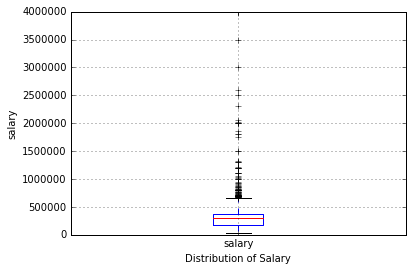

In [11]:
#Box plot for Salary Analysis to understand the distribution
%matplotlib inline
import matplotlib.pyplot as plt
salary_df.boxplot(column="salary")
plt.xlabel("Distribution of Salary")
plt.ylabel("salary")


## Bivariate Analysis for continous to categorical data

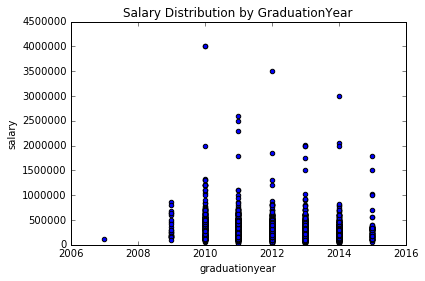

In [12]:
#Plotting scatter graph for Salary Distribution by GraduationYear
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["graduationyear"],salary_df["salary"])
plt.title("Salary Distribution by GraduationYear")
plt.xlabel("graduationyear")
plt.ylabel("salary")
#plt.axis([2007,2015,0,5000000])
plt.xlim(2006,2016)
plt.ylim(0,4500000)
plt.show()


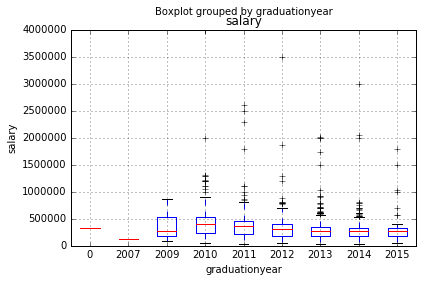

In [14]:
#Plotting a Box plot for Salary Distribution by GraduationYear
salary_df.boxplot(column="salary",by="graduationyear")
plt.xlabel("graduationyear")
plt.ylabel("salary")

In [ ]:
salary_df.plot(kind='bar')
plt.xlabel("graduationyear")
plt.ylabel("salary")

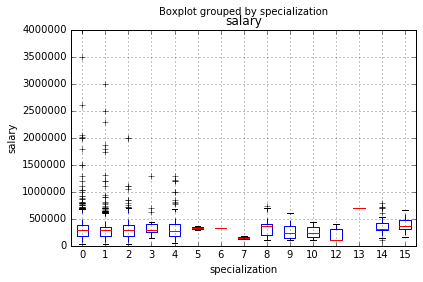

In [15]:
#Plotting a Box plot for Salary Distribution by GraduationYear
salary_df.boxplot(column="salary",by="specialization")
plt.xlabel("specialization")
plt.ylabel("salary")

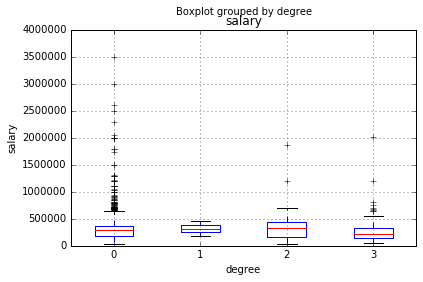

In [16]:
#Plotting a Box plot for Salary Distribution by Degree
salary_df.boxplot(column="salary",by="degree")
plt.xlabel("degree")
plt.ylabel("salary")

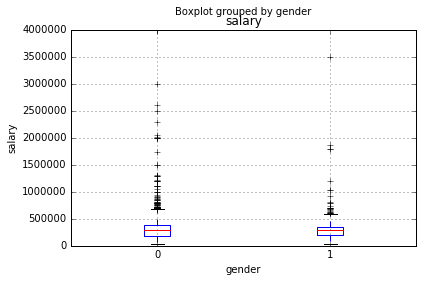

In [17]:
#Plotting a Box plot for Salary Distribution by Gender
salary_df.boxplot(column="salary",by="gender")
plt.xlabel("gender")
plt.ylabel("salary")

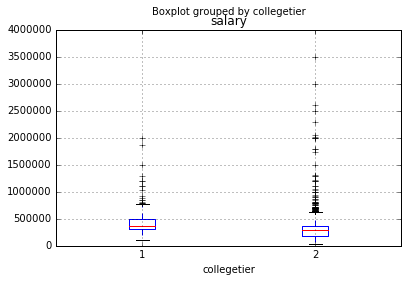

In [18]:
#Plotting a Box plot for Salary Distribution by CollegeTier
salary_df.boxplot(column="salary",by="collegetier")

## Bivariate Analysis for Continous to Continous data 

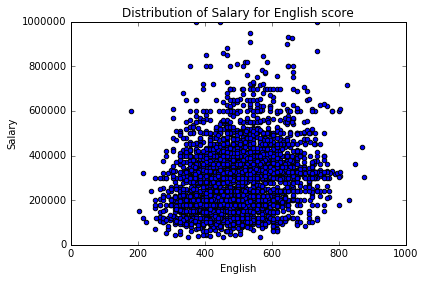

In [19]:
#Plotting Scatter Graph to show the distribution for English AMCAT Score
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["english"],salary_df["salary"])
plt.title("Distribution of Salary for English score")
plt.xlabel("English")
plt.ylabel("Salary")
plt.xlim(0,1000)
plt.ylim(0,1000000,500000)

plt.show()

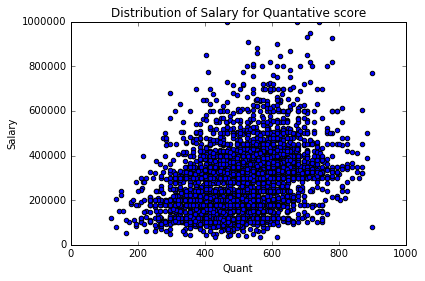

In [20]:
#Plotting Scatter Graph to show the distribution for Quantative AMCAT Score
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["quant"],salary_df["salary"])
plt.title("Distribution of Salary for Quantative score")
plt.xlabel("Quant")
plt.ylabel("Salary")
#plt.xlim(0,1000)
plt.ylim(0,1000000,500000)
plt.show()

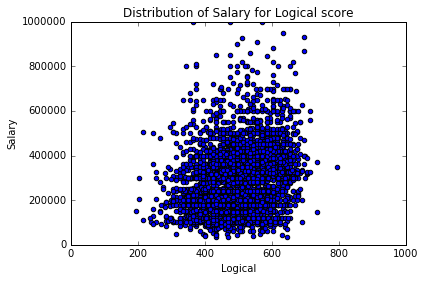

In [21]:
#Plotting Scatter Graph to show the distribution for Logical AMCAT Score
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["logical"],salary_df["salary"])
plt.title("Distribution of Salary for Logical score")
plt.xlabel("Logical")
plt.ylabel("Salary")
plt.xlim(0,1000)
plt.ylim(0,1000000,500000)
plt.show()

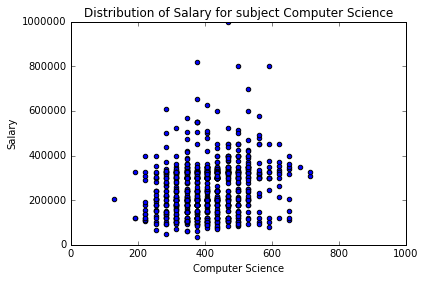

In [22]:
#Plotting Scatter Graph to show the distribution for Computerscience Score
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["computerscience"],salary_df["salary"])
plt.title("Distribution of Salary for subject Computer Science")
plt.xlabel("Computer Science")
plt.ylabel("Salary")
plt.xlim(0,1000)
plt.ylim(0,1000000)
plt.show()

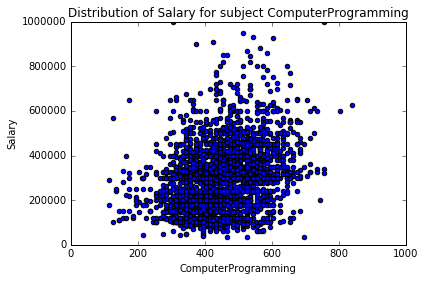

In [23]:
#Plotting Scatter Graph to show the distribution for Computerscience Score
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["computerprogramming"],salary_df["salary"])
plt.title("Distribution of Salary for subject ComputerProgramming")
plt.xlabel("ComputerProgramming")
plt.ylabel("Salary")
plt.xlim(0,1000)
plt.ylim(0,1000000,500000)
plt.show()

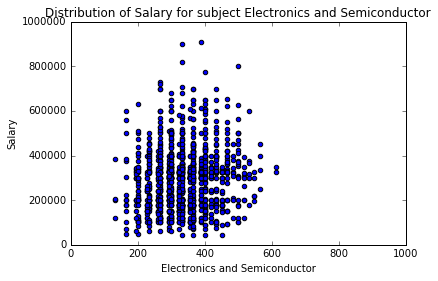

In [24]:
#Plotting Scatter Graph to show the distribution for electronics and semiconductor
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["electronicsandsemicon"],salary_df["salary"])
plt.title("Distribution of Salary for subject Electronics and Semiconductor")
plt.xlabel("Electronics and Semiconductor")
plt.ylabel("Salary")
plt.xlim(0,1000,100)
plt.ylim(0,1000000,500000)
plt.show()

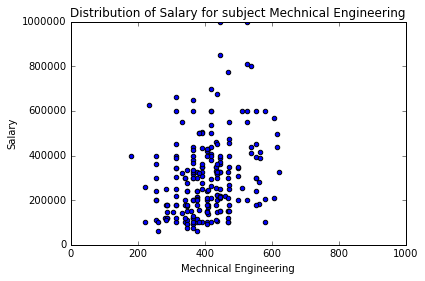

In [25]:
#Plotting Scatter Graph to show the distribution for Mechnical Engineering
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["mechanicalengg"],salary_df["salary"])
plt.title("Distribution of Salary for subject Mechnical Engineering")
plt.xlabel("Mechnical Engineering")
plt.ylabel("Salary")
plt.xlim(0,1000)
plt.ylim(0,1000000)
plt.show()

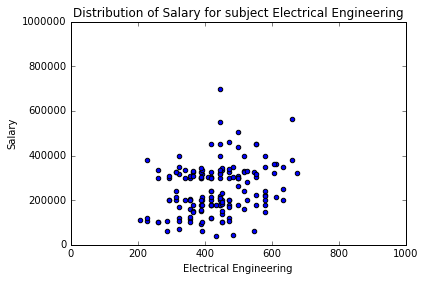

In [26]:
#Plotting Scatter Graph to show the distribution for Electrical Engineering
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["electricalengg"],salary_df["salary"])
plt.title("Distribution of Salary for subject Electrical Engineering")
plt.xlabel("Electrical Engineering")
plt.ylabel("Salary")
plt.xlim(0,1000)
plt.ylim(0,1000000)
plt.show()

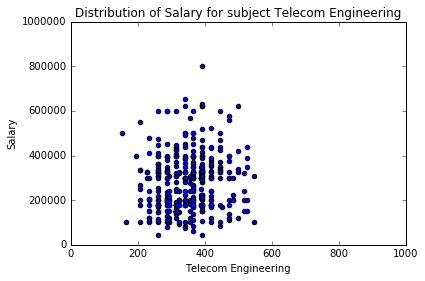

In [27]:
#Plotting Scatter Graph to show the distribution for Telecom Engineering
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["telecomengg"],salary_df["salary"])
plt.title("Distribution of Salary for subject Telecom Engineering")
plt.xlabel("Telecom Engineering")
plt.ylabel("Salary")
plt.xlim(0,1000)
plt.ylim(0,1000000)
plt.show()

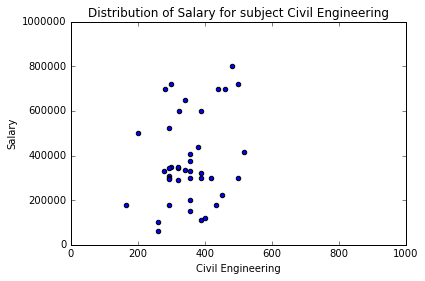

In [28]:
#Plotting Scatter Graph to show the distribution for Civil Engineering
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(salary_df["civilengg"],salary_df["salary"])
plt.title("Distribution of Salary for subject Civil Engineering")
plt.xlabel("Civil Engineering")
plt.ylabel("Salary")
plt.xlim(0,1000)
plt.ylim(0,1000000)
plt.show()

# Calculating correlation
Spearman correlation is used here instead of Pearson as it is understood that Spearman correlation is not influenced by the effect of outliers

In [29]:
#Calculating the spearmans correlation of columns
salary_df.corr(method ='spearman')["salary"]

candidateid             -0.307292
salary                   1.000000
gender                  -0.029092
tenthpercentage          0.293321
twelvegraduation        -0.161838
twelvepercentage         0.279319
collegeid               -0.146144
collegetier             -0.199656
degree                  -0.070101
specialization           0.007732
collegepercentage        0.226437
graduationyear          -0.234644
english                  0.269406
logical                  0.254986
quant                    0.364341
computerprogramming      0.291094
electronicsandsemicon    0.124830
computerscience          0.201433
mechanicalengg           0.266869
electricalengg           0.267664
telecomengg              0.136174
civilengg                0.179781
Name: salary, dtype: float64

In [30]:
# convert dataframe salary_df to dictionary salary_dict to load to postgreSQL
#Salary_dict = salary_df.set_index('CandidateID').T.to_dict('list')
import pprint
salary_dict ={}
salary_list =[]

#convert dataframe to list
salary_list = salary_df.T.to_dict().values()


In [31]:
""" utility function to execute some SQL statement can take optional arguments to fill in (dictionary) error 
and transaction handling built-in """

def pgexec( conn, sqlcmd, args, msg, silent=False ):
   
   retval = False
   with conn:
      with conn.cursor() as cur:
         try:
            if args is None:
               cur.execute(sqlcmd)
            else:
               cur.execute(sqlcmd, args)
            if silent == False: 
                print("success: " + msg)
            retval = True
         except Exception as e:
            if silent == False: 
                print("db error: ")
                print(e)
   return retval

In [127]:
""" utility function to execute some SQL query statement
       can take optional arguments to fill in (dictionary)
       will print out on screen the result set of the query
       error and transaction handling built-in """

def pgquery( conn, sqlcmd, args, silent=False ):
   
   retval = False
   with conn:
      with conn.cursor() as cur:
         try:
            if args is None:
                cur.execute(sqlcmd)
            else:
                cur.execute(sqlcmd, args)
            if silent == False:
                for record in cur:
                    print(record)
            retval = True
         except Exception as e:
            if silent == False:
                print("db read error: ")
                print(e)
   return retval

In [37]:
# get connected to the database
import psycopg2
DATABASENAME = 'skal3538'

try: 
    conn = psycopg2.connect(database=DATABASENAME)
    print('connected')
except Exception as e:
    print("unable to connect to the database")
    print(e)
#connection = pg.connect("dbname=skal3538 user=skal3538")
#print("Connected")


unable to connect to the database
could not connect to server: No such file or directory
	Is the server running locally and accepting
	connections on Unix domain socket "/tmp/.s.PGSQL.5432"?



In [129]:
# check content of Salary table

query_stmt = "SELECT * FROM salary;"
print(query_stmt)
pgquery (conn, query_stmt, None)


conn.close();

SELECT * FROM salary;
(203097, Decimal('420000'), None, 'senior quality engineer', 'Bangalore                                                   ', 1, None, Decimal('84'), 'board ofsecondary education,ap', None, Decimal('96'), 'board of intermediate education,ap', Decimal('2'), Decimal('0'), '0                                                           ', Decimal('78.0'), None, Decimal('515'), Decimal('585'), Decimal('525'), Decimal('445'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'))
(579905, Decimal('500000'), None, 'assistant manager', 'Indore                                                      ', 0, None, Decimal('85'), 'cbse', None, Decimal('85'), 'cbse', Decimal('2'), Decimal('0'), '1                                                           ', Decimal('70.06'), None, Decimal('695'), Decimal('610'), Decimal('780'), Decimal('NaN'), Decimal('466'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'), Decimal('NaN'))
(8106

In [181]:
import psycopg2
try: 
    conn = psycopg2.connect(database=DATABASENAME)
    print('connected')
except Exception as e:
    print("unable to connect to the database")
    print(e)
    
try: 
    conn = psycopg2.connect(database=DATABASENAME)
    print('connected')
except Exception as e:
    print("unable to connect to the database")
    print(e)

# 2nd: load data
# IMPORTANT: make sure the header line of CSV is without spaces!
#insert_stmt = """INSERT INTO Salary(candidateid,graduationyear,salary,specialisation,doj,designation,jobcity,gender,dob,percent10,
#                    board10,graduation12,percentage12,board12,collegetier,degree,collegepercentage,logical,english,quant,computerprogramming,
#                    electronicsandsemicon,computerscience,mechanicalengg,electicalengg,telecomengg,civilengg)
#                     VALUES (%(source)s, %(oct04_flux)s, %(oct04_err)s, %(oct05_flux)s, %(oct05_err)s, %(apr06_flux)s, %(apr06_err)s)"""
insert_stmt = """insert into Salary(candidateid,salary,designation,
jobcity,gender,tenthpercentage,tenthboard,
twelvepercentage,twelveboard,collegetier,degree,specialization,
collegepercentage,english,logical,quant,computerprogramming,
electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg)
values 
(%(candidateid)s,%(salary)s,%(designation)s,
%(jobcity)s,%(gender)s,%(tenthpercentage)s,%(tenthboard)s,
%(twelvepercentage)s,%(twelveboard)s,%(collegetier)s,%(degree)s,%(specialization)s,
%(collegepercentage)s,%(english)s,%(logical)s,%(quant)s,%(computerprogramming)s,
%(electronicsandsemicon)s,%(computerscience)s,%(mechanicalengg)s,%(electricalengg)s,%(telecomengg)s,%(civilengg)s);"""
i=0
#print(Salary_dict[203097])
#print(Salary_list[0])
for row in salary_list:
#if i == 0:
        pgexec (conn, insert_stmt, row, "row inserted")
        #print(row)
#i = i+1

connected
connected
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row inserted
success: row